<a href="https://colab.research.google.com/github/SampritiMayra/Data_Analysis_prep/blob/main/Copy_of_WEEK_3_GRADED_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SA-2022 WEEK 3 GRADED ASSIGNMENT

> Spaceship Titanic

Predict which passengers are transported to an alternate dimension

![](https://www.gannett-cdn.com/-mm-/682bf77435754aee88576469063388a7d8b07c2a/c=0-150-1280-873/local/-/media/2017/02/01/Reno/RGJ/636215634914521096-image001.jpg?width=660&height=373&fit=crop&format=pjpg&auto=webp)


### <b>Description</b>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

### <b>Data description</b>

- Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- <code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- <code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.
- <code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- <code>Cabin</code> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- <code>Destination</code> - The planet the passenger will be debarking to.
- <code>Age</code> - The age of the passenger.
- <code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.
- <code>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</code> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- <code>Name</code> - The first and last names of the passenger.
- <code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


### <b>Algorithm Documentation</b> (Highly recommended!)
- <code>Logistic Regression</code> : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- <code>SVM</code> : https://scikit-learn.org/stable/modules/svm.html
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- <code>Plot Confusion Matrix</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
- <code>ROC_AUC Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
- <code>Classification Report</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- <code>Label Encoder</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- <code>Label Binarizer</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
- <code>Standard Scaler</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- <code>Cross Val Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Install Required Libraries</h1></span>

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, precision_score, f1_score
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.svm import SVC       # for SVM algorithm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
import warnings
warnings.filterwarnings("ignore")

#### Read the data

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

df = pd.read_csv('/content/gdrive/MyDrive/Copy of data.csv')
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,Andromeda,39,False,0,0,0,0,0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,Andromeda,24,False,109,9,25,549,44,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,Andromeda,58,True,43,3576,0,6715,49,Altark Susent,False
3,0003_02,Europa,False,A/0/S,Andromeda,33,False,0,1283,371,3329,193,Solam Susent,False
4,0004_01,Earth,False,F/1/S,Andromeda,16,False,303,70,151,565,2,Willy Santantines,True


#### Check the shape of data. It should be  (8693, 14)

In [ ]:
## ======== YOUR CODE HERE ======== ##

df.shape

## ================================ ##

(8693, 14)

#### Apply describe on dataframe

In [ ]:
## ======== YOUR CODE HERE ======== ##
df.describe()
## ================================ ##

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### Check if there any null value in the dataset.

In [ ]:
## ======== YOUR CODE HERE ======== ##

df.isnull().sum()

## ================================ ##

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

#### Number continuous and categorical features

In [ ]:
df.keys()

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:


continous_features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa', 'VRDeck'] # Fill the continuous fearures inside the array
categorical_features = ['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','VIP','Name', 'Transported'] # Fill the categorical features inside the array


print("Continous Features: ", continous_features)
print("No. of Continuous features: ", len(continous_features))

print("Categorical Features: ", categorical_features)
print("No. of Categorical Features: ", len(categorical_features))

Continous Features:  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
No. of Continuous features:  6
Categorical Features:  ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']
No. of Categorical Features:  8


#### Unique values

In [ ]:
# Print the number of unique values of the categorical features from the DataFrame
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

<code>Note: If we apply one-hot-encoding to a categorical feature with many unique values, </code>
- Number of columns will be high
- Time required for training a model will be high
- We may not get usefull insights about the data

<code>This is the reason we are droping the features with more unique values.</code>


#### Drop the features

In [ ]:
# Drop those categorical features which have more than 25 unique values

## ======== YOUR CODE HERE ======== ##

df.drop(['PassengerId','Name','Cabin'] , axis = 1, inplace = True)
print("Shape : ", df.shape)
## ======== YOUR CODE HERE ======== ##

# Print the shape after droping the features
# Check: Shape --> (8693, 11)

## ======== YOUR CODE HERE ======== ##



## ======== YOUR CODE HERE ======== ##

Shape :  (8693, 11)


#### One Hot Encoding

In [ ]:
# Hint: search for get_dummies

## ======== YOUR CODE HERE ======== ##
df = pd.get_dummies(data = df)
print("Shape :", df.shape)
df.head()


## ======== YOUR CODE HERE ======== ##

# Check: Shape --> (8693, 15)

Shape : (8693, 15)


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Andromeda,Destination_Cygnus,Destination_Virgo
0,False,39,False,0,0,0,0,0,False,0,1,0,1,0,0
1,False,24,False,109,9,25,549,44,True,1,0,0,1,0,0
2,False,58,True,43,3576,0,6715,49,False,0,1,0,1,0,0
3,False,33,False,0,1283,371,3329,193,False,0,1,0,1,0,0
4,False,16,False,303,70,151,565,2,True,1,0,0,1,0,0


#### Changing bool columns to 0,1

In [ ]:
## ======== Run this code(Don't change any code)======== ##

df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)

df.head()

## ======== Run this code(Don't change any code)======== ##


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Andromeda,Destination_Cygnus,Destination_Virgo
0,0,39,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,24,0,109,9,25,549,44,1,1,0,0,1,0,0
2,0,58,1,43,3576,0,6715,49,0,0,1,0,1,0,0
3,0,33,0,0,1283,371,3329,193,0,0,1,0,1,0,0
4,0,16,0,303,70,151,565,2,1,1,0,0,1,0,0


#### Split the data into train and test

In [ ]:
## ======== YOUR CODE HERE ======== ##
 
## Test size should be 15% of the full dataset and use random state = 2022

Y = df['Transported']
X = df.drop('Transported', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.15, random_state=2022)


In [ ]:
## ======== YOUR CODE HERE ======== ##

   ## Let us print the shapes:
    
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test

## ================================ ##

X_train: (7389, 14)
X_test: (1304, 14)
y_train: (7389,)
y_test: (1304,)


#### Scale the data using Standard Scaler

In [ ]:
## Use Standard Scaler to scale the train and test data
#Using Standard Scaler from sklearn library
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)


## <b>Logistic Regression</b>
#### Use default parameters unless mentioned

In [ ]:
## Use Random state = 2021 and fit the LR model

Lr_model = LogisticRegression(random_state=2021)
Lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=2021)

In [ ]:
y_pred = Lr_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

#### Plot confusion matrix

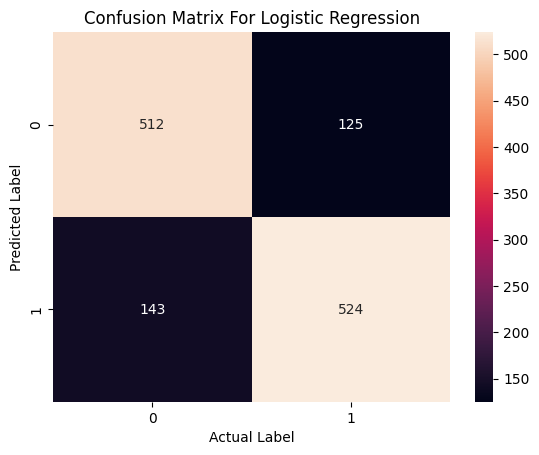

In [ ]:
#Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot = True, fmt='g') #annot=True to annotate cells, ftm='g' to disable scientific notation
plt.ylabel ('Predicted Label')
plt.xlabel ('Actual Label')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()

#### Print classification report

In [ ]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.782     0.804     0.793       637
           1      0.807     0.786     0.796       667

    accuracy                          0.794      1304
   macro avg      0.795     0.795     0.794      1304
weighted avg      0.795     0.794     0.795      1304



#### Print accuracy score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7944785276073619


#### Print ROC-AUC score

In [ ]:
#predict probabilities
probs = Lr_model.predict_proba(X_test_scaled)
#Keep probabilities for the positive outcome only
probs = probs[:, 1]
#auc score computation
auc = roc_auc_score(y_test, probs)
print("AUC Test Score :", auc)

AUC Test Score : 0.877197978718647


#### Plot ROC-AUC Curve

Text(0, 0.5, 'True Positive Rate')

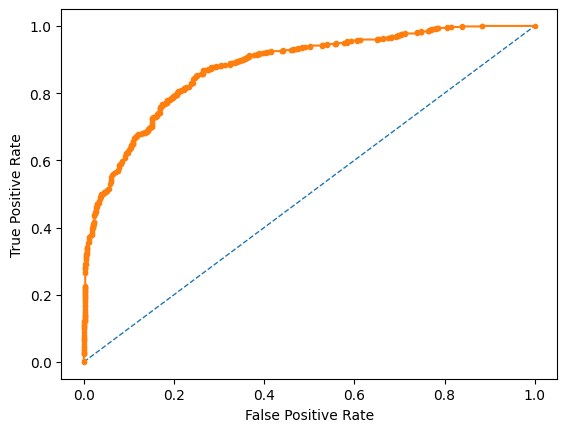

In [ ]:
#Calculate Roc Curve 
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle ='--' , linewidth = 1)
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### Cross validation

In [ ]:
scores = cross_val_score(Lr_model, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.78619756 0.79364005 0.76792963 0.80243572 0.7731889 ]
Average cross-validation score: 0.7846783746815171


## <b>SVM</b>
#### Use default parameters unless mentioned

In [ ]:
## parameters: random_state = 2022, C=5, gamma='scale', kernel='rbf', probability=True
svm_model = SVC(random_state = 2022, C=5, gamma='scale', kernel='rbf',  probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(C=5, probability=True, random_state=2022)

In [ ]:
y_pred = svm_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

#### Plot confusion matrix

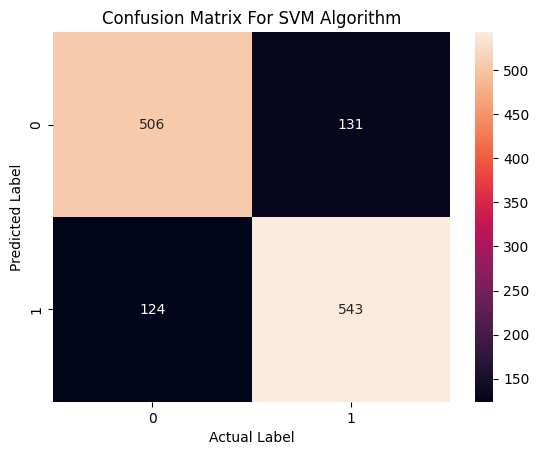

In [ ]:
#Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot = True, fmt='g') #annot=True to annotate cells, ftm='g' to disable scientific notation
plt.ylabel ('Predicted Label')
plt.xlabel ('Actual Label')
plt.title('Confusion Matrix For SVM Algorithm')
plt.show()

#### Print classification report

In [ ]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.803     0.794     0.799       637
           1      0.806     0.814     0.810       667

    accuracy                          0.804      1304
   macro avg      0.804     0.804     0.804      1304
weighted avg      0.804     0.804     0.804      1304



#### Print accuracy score

In [ ]:
print("Accuracy score = ", accuracy_score(y_test,y_pred))

Accuracy score =  0.8044478527607362


#### Print ROC-AUC score

In [ ]:
#predict probabilities
probs = svm_model.predict_proba(X_test_scaled)
#Keep probabilities for the positive outcome only
probs = probs[:, 1]
#auc score computation
auc = roc_auc_score(y_test, probs)
print("AUC Test Score :", auc)

AUC Test Score : 0.8687238013646239


#### Plot ROC-AUC curve

Text(0, 0.5, 'True Positive Rate')

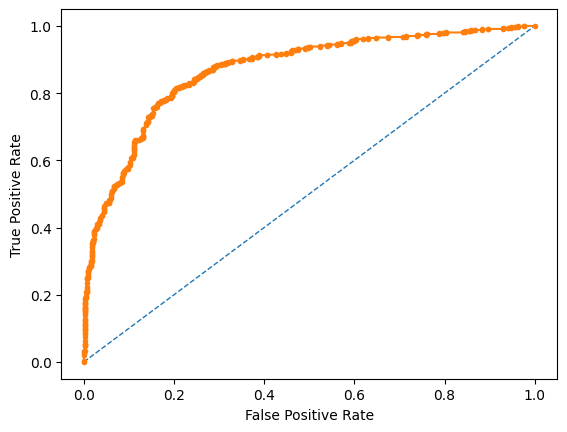

In [ ]:
#Calculate Roc Curve 
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle ='--' , linewidth = 1)
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### Cross validation

In [ ]:
#cv=5 
scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')


Cross-validation scores: [0.79093369 0.78755074 0.76454668 0.80514208 0.77386594]
Average cross-validation score: 0.7844078303037189


# Congratulations! Assignment Completed! 